# Name: Anthony Rodrigues
# Roll. No: 58
# SE AIML B3

In [27]:
!pip install numpy
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

You should consider upgrading via the 'c:\users\hp\desktop\sfit-admin\aiml-lab-sem4\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hp\desktop\sfit-admin\aiml-lab-sem4\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hp\desktop\sfit-admin\aiml-lab-sem4\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hp\desktop\sfit-admin\aiml-lab-sem4\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [28]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from scipy.optimize import minimize

In [29]:
x= np.array([1, 2, 3]).reshape(-1,1)
y= np.array([2, 3, 5])

In [30]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [31]:
w = model.coef_[0]
b = model.intercept_
print(f"The slope is: {w} ")
print(f"The intertcept is: {b} ")

The slope is: 1.4999999999999993 
The intertcept is: 0.3333333333333348 


In [32]:
y_pred = model.predict(x)
print("\nPredictions for training data")
for xi,yi, ypi in zip(x.flatten(), y ,  y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y= {ypi}")
    


Predictions for training data
x = 1, Actual y = 2, Predicted y= 1.8333333333333341
x = 2, Actual y = 3, Predicted y= 3.3333333333333335
x = 3, Actual y = 5, Predicted y= 4.833333333333333


# Recitation example

In [33]:
x= np.array([10, 20, 30, 50]).reshape(-1,1)
y= np.array([12, 21, 29, 48])

model = LinearRegression()
model.fit(x,y)

w = model.coef_[0]
b = model.intercept_
print(f"The slope is: {w} ")
print(f"The intertcept is: {b} ")

y_pred = model.predict(x)
print("\nPredictions for training data")
for xi,yi, ypi in zip(x.flatten(), y ,  y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y= {ypi}")
    

The slope is: 0.8971428571428574 
The intertcept is: 2.828571428571422 

Predictions for training data
x = 10, Actual y = 12, Predicted y= 11.799999999999995
x = 20, Actual y = 21, Predicted y= 20.77142857142857
x = 30, Actual y = 29, Predicted y= 29.742857142857144
x = 50, Actual y = 48, Predicted y= 47.68571428571429


## LR USING MLE

In [34]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [35]:
x= np.array([1, 2, 3]).reshape(-1,1)
y= np.array([2, 3, 5])

In [36]:
#neg log likelihood
def neg_log_likelihood(params):
    w, b = params
    sigma2 = 1 #assume variance=1
    y_pred = w*x + b
    nll = 0.5*np.sum(y-y_pred)**2/sigma2
    return nll

In [37]:
initial_guess= [0, 0]

In [38]:
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x
print(f"Slope is {w_mle}")
print(f"Intercept is {b_mle}")

Slope is 1.3333332689773876
Intercept is 0.6666667870743772


In [39]:
#step 5 prediction
y_pred = w_mle*x + b_mle
print("\nPredictions for training data")
for xi,yi, ypi in zip(x.flatten(), y ,  y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y= {ypi}")


Predictions for training data
x = 1, Actual y = 2, Predicted y= [2.00000006]
x = 2, Actual y = 3, Predicted y= [3.33333333]
x = 3, Actual y = 5, Predicted y= [4.66666659]


In [40]:
#step 6 error
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared_error is: {mse}")
print(f"R2_Score is: {r2}")

Mean Squared_error is: 0.07407408837539818
R2_Score is: 0.952380943187244


## LR USING GD


In [41]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
x= np.array([1, 2, 3])
y= np.array([2, 3, 5])

In [43]:
w, b=0, 0
alpha = 0.001
n_iter = 40000
n = len(x)

In [44]:
for i in range(n_iter):
    y_pred = w* x.flatten() +b
    dw = (-2/n)*np.sum(x.flatten()*(y-y_pred))
    db= (-2/n)*np.sum(y-y_pred)
    w = w - alpha * dw
    b = b- alpha * db
print(f"slope is: {w}")
print(f"Bias is: {b}")


slope is: 1.4999919854602075
Bias is: 0.3333515522660957


### LR USING GD WITH SINGLE PARAMETER

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
x= np.array([1, 2, 3])
y= np.array([2, 3, 5])
n=len(x)

In [47]:
#loss func
def loss(w1): 
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1 * x + w0
    return np.sum((y-y_pred)**2)

In [48]:
# calculate gradient of J wrt w1
def gradient(w1):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1*x + w0
    return -2*np.sum(x*(y-y_pred))
    

In [49]:
lr = 0.1
w1 = 4
iter = 15
w1_values = []
loss_values = []
for i in range(iter):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 -= lr* grad


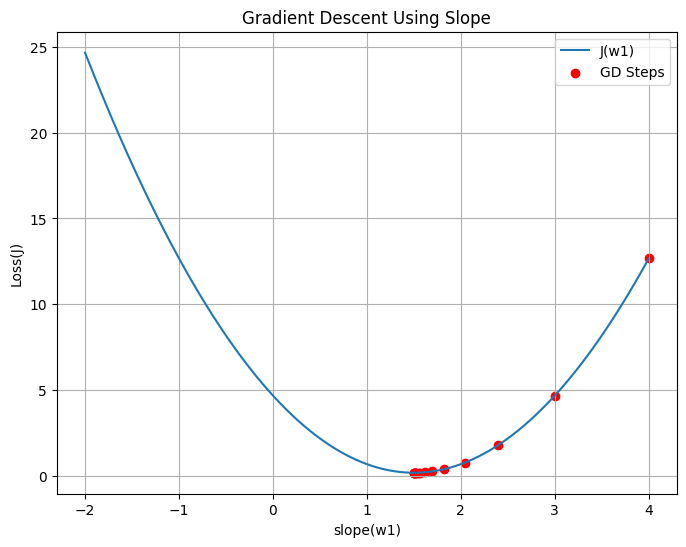

In [50]:
# plot loss func and GD
w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w  in w_space]

plt.figure(figsize = (8 , 6))
plt.plot(w_space, loss_space, label= "J(w1)")
plt.scatter(w1_values, loss_values, color="red", label="GD Steps")
plt.xlabel("slope(w1)")
plt.ylabel("Loss(J)")
plt.title("Gradient Descent Using Slope")
plt.legend()
plt.grid(True)
plt.show()           